# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

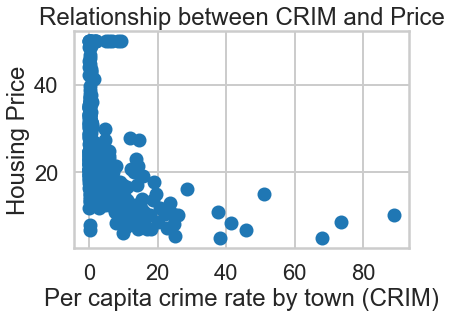

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

Below is the same scatter plot that shows the relationship between price and crime in Boston. 
The red line is the line of best fit derived using ordinary least squares. 
This shows a visualization of the relationship between the two variables


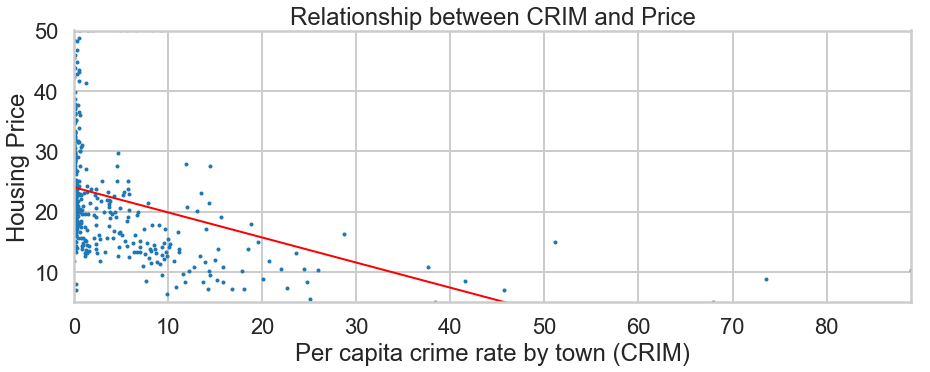

The Pearson coefficient is a quantitative description of how closely two variables are related. 
The Pearson for crime and price is -0.39 which indicates there is a moderate negative relationship. 
So this suggests that in very general terms, the more crime in an area, the lower the housing price -- though 
there are indeed cases where there is relatively almost no crime and the house price is still low. 

There is also quite a bit of outliers for the crime data. Some areas just have proportionally high crime.


In [13]:
print("Below is the same scatter plot that shows the relationship between price and crime in Boston. \
\nThe red line is the line of best fit derived using ordinary least squares. \
\nThis shows a visualization of the relationship between the two variables")

#generate line of best fit
m, b = np.polyfit(bos.CRIM, bos.PRICE, 1)
x_ = np.arange(0, max(bos.PRICE))
y_ = m*x_ + b

#plotting data
f, axes = plt.subplots(figsize=(15,5))
plt.scatter(bos.CRIM, bos.PRICE, s=4)
plt.plot(x_, y_, color="red", linewidth=2)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
plt.xlim(min(bos.CRIM), max(bos.CRIM))
plt.ylim(min(bos.PRICE), max(bos.PRICE))
plt.show()

#getting measure of correlation
pearson = stats.pearsonr(bos.CRIM, bos.PRICE)[0]

print("The Pearson coefficient is a quantitative description of how closely two variables are related. \
\nThe Pearson for crime and price is %.2f which indicates there is a moderate negative relationship. \
\nSo this suggests that in very general terms, the more crime in an area, the lower the housing price -- though \
\nthere are indeed cases where there is relatively almost no crime and the house price is still low. \
\n\nThere is also quite a bit of outliers for the crime data. Some areas just have proportionally high crime." %pearson)

We have the same plots below but this time for the average number of rooms vs. price. 
It is intuitive to assume that the more rooms, the higher the price. The plots below confirm this.


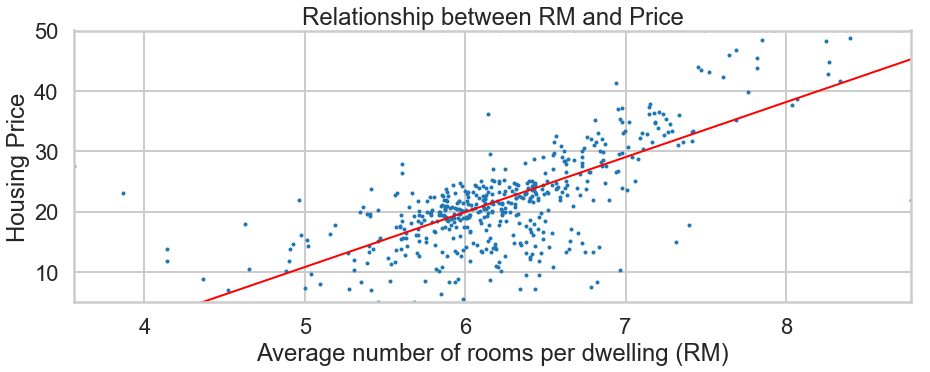

We clearly see a strong linear relationship based on the plot. Even the Pearson coefficient of 0.70 confirms this strong and positive correlation.


In [14]:
print("We have the same plots below but this time for the average number of rooms vs. price. \
\nIt is intuitive to assume that the more rooms, the higher the price. The plots below confirm this.")

#generate line of best fit
m, b = np.polyfit(bos.RM, bos.PRICE, 1)
x_ = np.arange(0, max(bos.PRICE))
y_ = m*x_ + b

#plotting data
f, axes = plt.subplots(figsize=(15,5))
plt.scatter(bos.RM, bos.PRICE, s=4)
plt.plot(x_, y_, color="red", linewidth=2)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.xlim(min(bos.RM), max(bos.RM))
plt.ylim(min(bos.PRICE), max(bos.PRICE))
plt.show()

#getting measure of correlation
pearson = stats.pearsonr(bos.RM, bos.PRICE)[0]

print("We clearly see a strong linear relationship based on the plot. Even the Pearson coefficient of %.2f confirms \
this strong and positive correlation." %pearson)

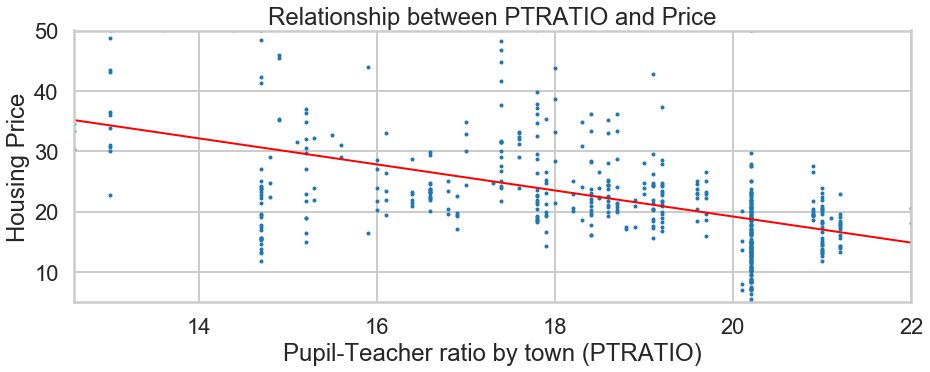

We perform the same plot for the student-teacher ratio (PTRATIO) vs. price. 
Though there is a clear negative linear correlation having a Pearson of -0.51, 
it can be seen on the chart that residuals (the distances of points to lines) 
can be high in plenty of cases.


In [15]:
#generate line of best fit
m, b = np.polyfit(bos.PTRATIO, bos.PRICE, 1)
x_ = np.arange(0, max(bos.PRICE))
y_ = m*x_ + b

#plotting data
f, axes = plt.subplots(figsize=(15,5))
plt.scatter(bos.PTRATIO, bos.PRICE, s=4)
plt.plot(x_, y_, color="red", linewidth=2)
plt.xlabel("Pupil-Teacher ratio by town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")
plt.xlim(min(bos.PTRATIO), max(bos.PTRATIO))
plt.ylim(min(bos.PRICE), max(bos.PRICE))
plt.show()

#getting measure of correlation
pearson = stats.pearsonr(bos.PTRATIO, bos.PRICE)[0]

print("We perform the same plot for the student-teacher ratio (PTRATIO) vs. price. \
\nThough there is a clear negative linear correlation having a Pearson of %.2f, \
\nit can be seen on the chart that residuals (the distances of points to lines) \
\ncan be high in plenty of cases." %pearson)

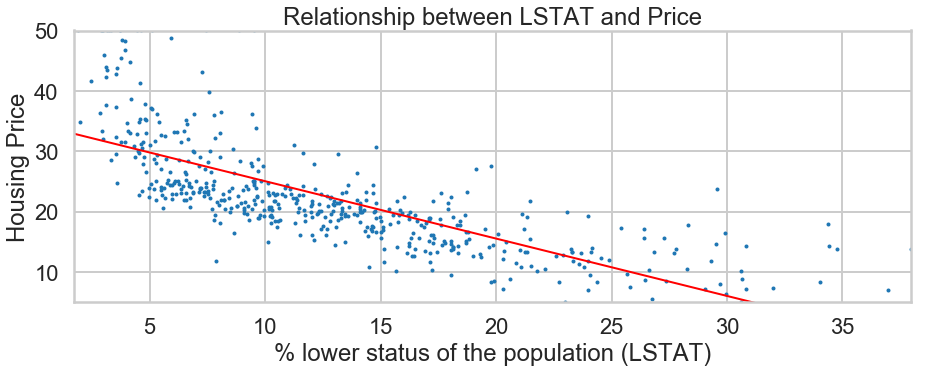

LSTAT is the proportion of lower status population in a given area. It can be expected that the higher 
the proportion is, the more affordable the house prices are. The Pearson coefficent of -0.74 confirms that 
there is a strong negative correlation.


In [16]:
#generate line of best fit
m, b = np.polyfit(bos.LSTAT, bos.PRICE, 1)
x_ = np.arange(0, max(bos.PRICE))
y_ = m*x_ + b

#plotting data
f, axes = plt.subplots(figsize=(15,5))
plt.scatter(bos.LSTAT, bos.PRICE, s=4)
plt.plot(x_, y_, color="red", linewidth=2)
plt.xlabel("% lower status of the population (LSTAT)")
plt.ylabel("Housing Price")
plt.title("Relationship between LSTAT and Price")
plt.xlim(min(bos.LSTAT), max(bos.LSTAT))
plt.ylim(min(bos.PRICE), max(bos.PRICE))
plt.show()

#getting measure of correlation
pearson = stats.pearsonr(bos.LSTAT, bos.PRICE)[0]


print("LSTAT is the proportion of lower status population in a given area. It can be expected that the higher \
\nthe proportion is, the more affordable the house prices are. The Pearson coefficent of %.2f confirms that \
\nthere is a strong negative correlation." %pearson)

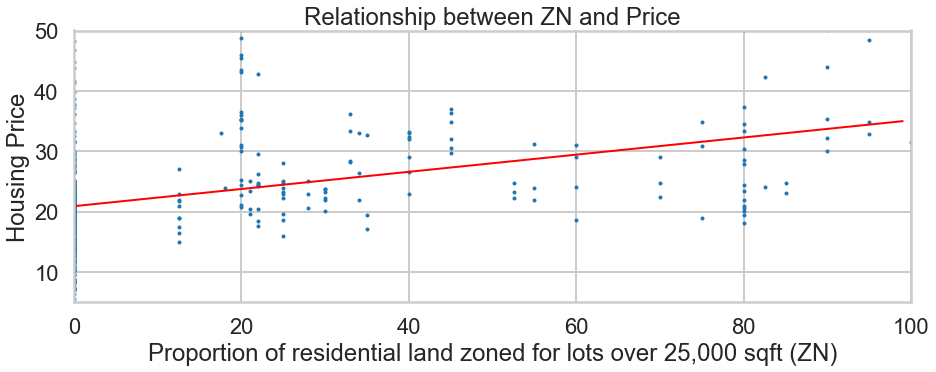

It would be reasonable to assume that if there is more houses that are upwards of 25,000 sqft in an area, 
the more likely that area is more expensive than areas with fewer houses of this characteristic. This is what is 
described by the variable ZN. The Pearson coefficient of 0.36 suggests that this is not the case given a weak correlation.

There is also such a large spread of house prices at ZN of 0. Either this is just true (because a residential lot
that massive is simply rare) or perhaps missing values could have been denoted as 0's.


In [17]:
#generate line of best fit
m, b = np.polyfit(bos.ZN, bos.PRICE, 1)
x_ = np.arange(0, 100)
y_ = m*x_ + b

#plotting data
f, axes = plt.subplots(figsize=(15,5))
plt.scatter(bos.ZN, bos.PRICE, s=4)
plt.plot(x_, y_, color="red", linewidth=2)
plt.xlabel("Proportion of residential land zoned for lots over 25,000 sqft (ZN)")
plt.ylabel("Housing Price")
plt.title("Relationship between ZN and Price")
plt.xlim(min(bos.ZN), max(bos.ZN))
plt.ylim(min(bos.PRICE), max(bos.PRICE))
plt.show()

#getting measure of correlation
pearson = stats.pearsonr(bos.ZN, bos.PRICE)[0]

print("It would be reasonable to assume that if there is more houses that are upwards of 25,000 sqft in an area, \
\nthe more likely that area is more expensive than areas with fewer houses of this characteristic. This is what is \
\ndescribed by the variable ZN. The Pearson coefficient of %.2f suggests that this is not the case given a weak \
correlation.\n\nThere is also such a large spread of house prices at ZN of 0. Either this is just true (because \
a residential lot\nthat massive is simply rare) or perhaps missing values could have been denoted as 0's." %pearson)

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

C:\Users\mlfba\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


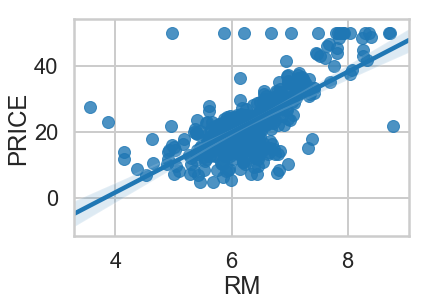

In [18]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


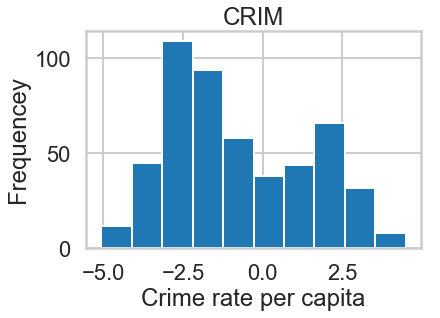

In [19]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

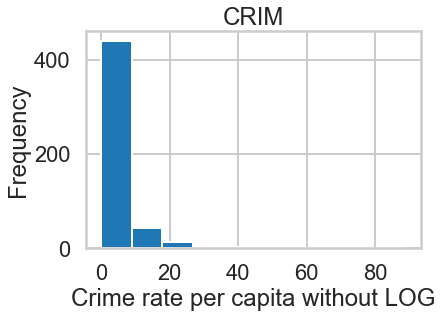

Above is the distribution plot for CRIM, if we've not taken the variable's log. We see such an imbalance 
towards the first bins. This is because most of our data is centered around up to just ~30 crimes per capita. 
At the same time, there are indeed neighborhoods that have relatively extreme number of crimes.
We could have dropped these points but of course we shouldn't since these outliers appear to be valid (some areas are
just worse than others) so taking the log smoothens the spread and almost approaches a normal distribution.


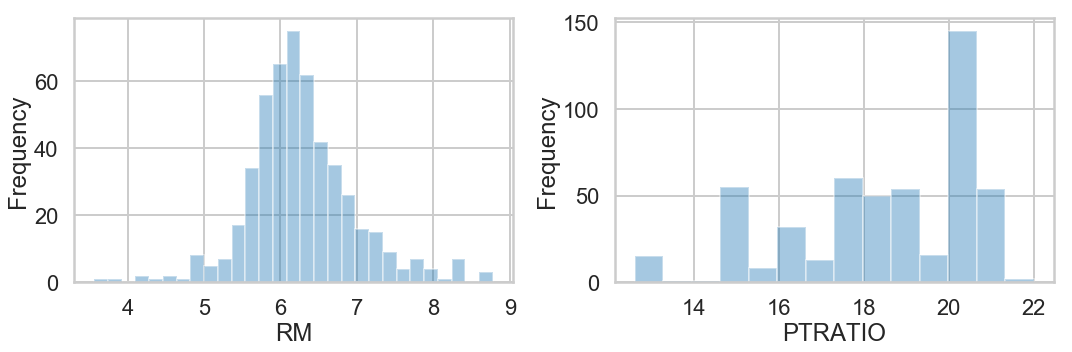

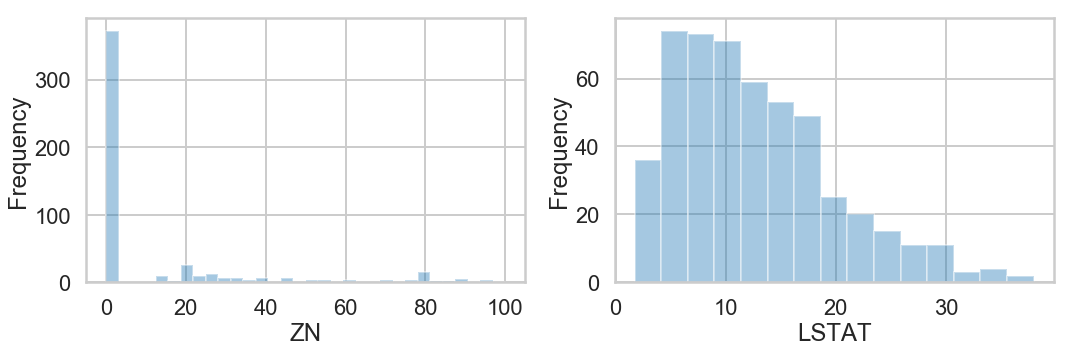

It does not appear that our four variables have any correlation with each other (i.e. no collinearity).


In [20]:
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita without LOG")
plt.ylabel("Frequency")
plt.show()

print("Above is the distribution plot for CRIM, if we've not taken the variable's log. We see such an imbalance \
\ntowards the first bins. This is because most of our data is centered around up to just ~30 crimes per capita. \
\nAt the same time, there are indeed neighborhoods that have relatively extreme number of crimes.\nWe could have \
dropped these points but of course we shouldn't since these outliers appear to be valid (some areas are\njust worse \
than others) so taking the log smoothens the spread and almost approaches a normal distribution.")

f, axes = plt.subplots(1, 2, figsize=(15,5))
ax = sns.distplot(bos.RM, kde=False, ax=axes[0])
ax.set(xlabel="RM", ylabel="Frequency")
ax = sns.distplot(bos.PTRATIO, kde=False, ax=axes[1])
ax.set(xlabel="PTRATIO", ylabel="Frequency")
plt.tight_layout()
plt.show()

f, axes = plt.subplots(1, 2, figsize=(15,5))
ax = sns.distplot(bos.ZN, kde=False, ax=axes[0])
ax.set(xlabel="ZN", ylabel="Frequency")
ax = sns.distplot(bos.LSTAT, kde=False, ax=axes[1])
ax.set(xlabel="LSTAT", ylabel="Frequency")
plt.tight_layout()
plt.show()

print("It does not appear that our four variables have any correlation with each other (i.e. no collinearity).")

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [21]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [22]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 21 Mar 2019   Prob (F-statistic):           2.49e-74
Time:                        00:01:45   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

There isn't a perfect linear relationship between the actual and predicted housing prices. 
We can see from the plot that there exists a lot of residuals or errors in the fit.


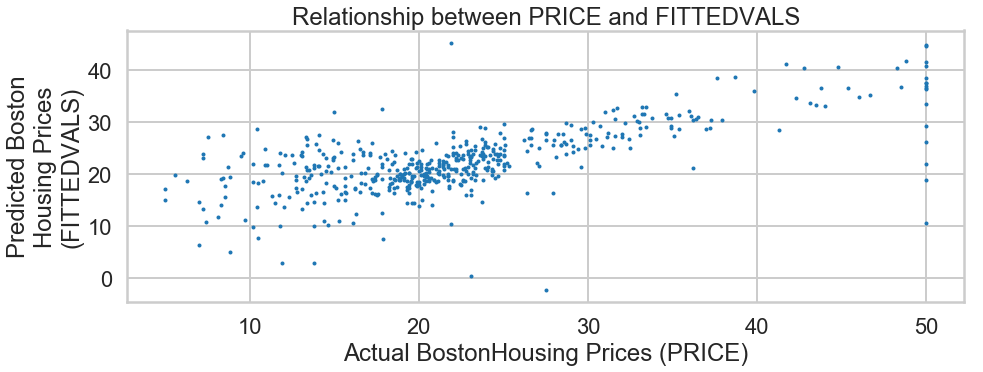

In [23]:
print("There isn't a perfect linear relationship between the actual and predicted housing prices. \
\nWe can see from the plot that there exists a lot of residuals or errors in the fit.")

f, axes = plt.subplots(figsize=(15,5))
plt.scatter(bos.PRICE, m.fittedvalues, s=4)
plt.xlabel("Actual BostonHousing Prices (PRICE)")
plt.ylabel("Predicted Boston\nHousing Prices\n(FITTEDVALS)")
plt.title("Relationship between PRICE and FITTEDVALS")
plt.show()

### Fitting Linear Regression using `sklearn`


In [24]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [25]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [26]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


Our linear model has an intercept of -34.67 which suggests that this is the price of a house that has no rooms. 
In that respect, the common argument for regression through the origin applies since it makes more sense to have 
$0 as price for a house of 0 rooms (or a "non"-house). However, as seen on the plots below, if we actually make 
use of the regression through the origin approach, we'll notice that the line of best fit would be way off. It then 
makes sense to stick to the linear model with the intercept as it is.


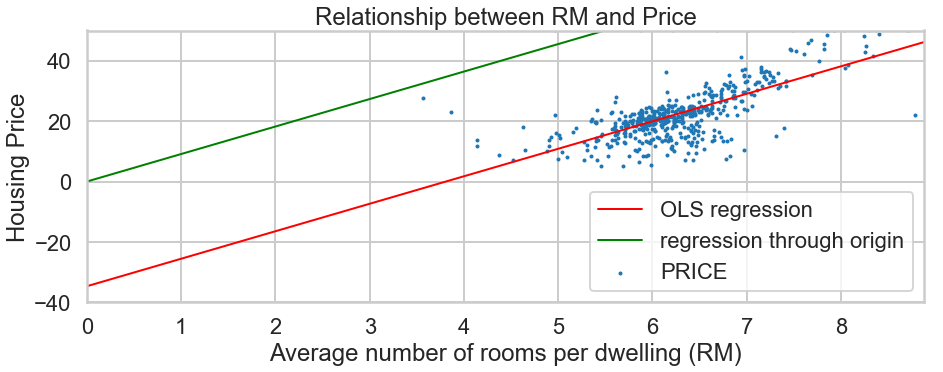

To answer the second question: Yes, it is enough that the residuals are normally distributed. In fact this is 
a pre-requisite for linear regression. If we do not satisfy this IID assumption for an analysis, we might not be able 
to trust the model's results.

For the third question, the statement is False. For us to use the linear regression model, we don't need the 
response variable Y to be normally distributed. It is the residuals of Y that has to meet this condition.


In [27]:
#creating line of best fit and reg line through origin
m, b = np.polyfit(bos.RM, bos.PRICE, 1)
x_ = np.arange(0, max(bos.PRICE))
y1 = m*x_ + b
y2 = m*x_

print("Our linear model has an intercept of %.2f which suggests that this is the price of a house that has no rooms. \
\nIn that respect, the common argument for regression through the origin applies since it makes more sense to have \
\n$0 as price for a house of 0 rooms (or a \"non\"-house). However, as seen on the plots below, if we actually make \
\nuse of the regression through the origin approach, we'll notice that the line of best fit would be way off. It then \
\nmakes sense to stick to the linear model with the intercept as it is." %b)

#plotting data
f, axes = plt.subplots(figsize=(15,5))
plt.scatter(bos.RM, bos.PRICE, s=4)
plt.plot(x_, y1, color="red", linewidth=2, label="OLS regression")
plt.plot(x_, y2, color="green", linewidth=2, label="regression through origin")
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.xlim(0, max(bos.RM)+.1)
plt.ylim(-40, max(bos.PRICE))
plt.legend()
plt.show()

print("To answer the second question: Yes, it is enough that the residuals are normally distributed. In fact this is \
\na pre-requisite for linear regression. If we do not satisfy this IID assumption for an analysis, we might not be able \
\nto trust the model's results.\n")

print("For the third question, the statement is False. For us to use the linear regression model, we don't need the \
\nresponse variable Y to be normally distributed. It is the residuals of Y that has to meet this condition.")

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [28]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.459488385089855


In [29]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [30]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [31]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

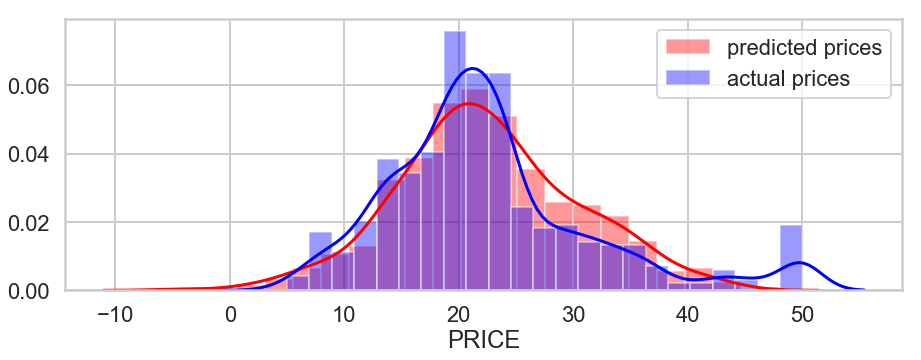

The above is the distribution plot of all the actual prices and the predicted prices. The predicted prices 
more closely mirror a normal curve compared to the actual prices. We see that the outliers disappeared. This is 
because the prediction is based on a best fit line -- the outliers may be truly unique cases or perhaps even missing 
values, but the point is that according to our model, they are expected to behave differently.


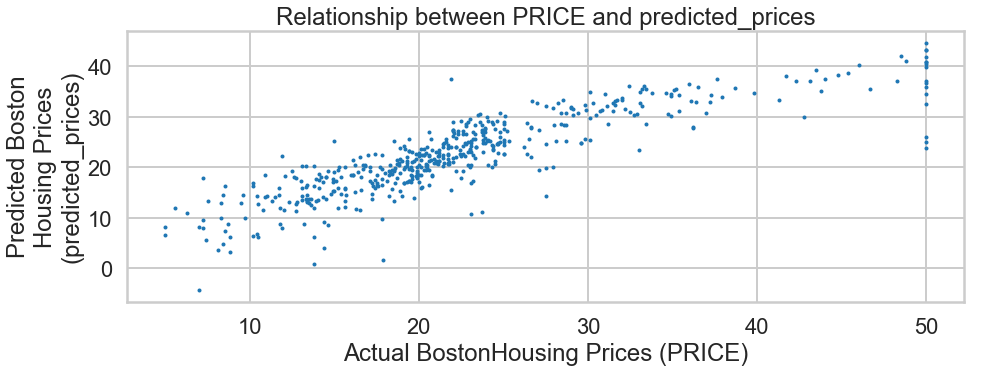

The above is the scatterplot that compares the actual housing prices vs. the predicted values derived via 
Scikit's linear regression estimator. It appears to be exactly the same as what we have derived using statsmodel. 

Though the predictions were based on different packages, both made use of OLS. And though both are powerful, 
I noticed that statsmodel is immediately capable of other approaches including weighted and partial least squares. 
Statsmodels also provide a more holistic summary including p-values and confidence intervals along with the 
calculated coefficient.

One advantage of Scikit for me though is syntax: with statsmodels, we have to interpret our call as formulas.
It is also needed that we input our variables from a dataframe. In Scikit, we can work with either dataframes
or even just numpy arrays as long as they have the same shape.


In [32]:
#ignore futurewarning from sns
import warnings
warnings.simplefilter(action="ignore", \
                      category=FutureWarning)

#get predicted prices
predicted_prices = lm.predict(X)

#plot the predicted prices
f, axes = plt.subplots(figsize=(15,5))
sns.distplot(predicted_prices, color="red", label="predicted prices")
sns.distplot(bos.PRICE, color="blue", label="actual prices")
plt.legend()
plt.show()

print("The above is the distribution plot of all the actual prices and the predicted prices. The predicted prices \
\nmore closely mirror a normal curve compared to the actual prices. We see that the outliers disappeared. This is \
\nbecause the prediction is based on a best fit line -- the outliers may be truly unique cases or perhaps even missing \
\nvalues, but the point is that according to our model, they are expected to behave differently.")

#scatterplot of predicted vs actual prices
f, axes = plt.subplots(figsize=(15,5))
plt.scatter(bos.PRICE, predicted_prices, s=4)
plt.xlabel("Actual BostonHousing Prices (PRICE)")
plt.ylabel("Predicted Boston\nHousing Prices\n(predicted_prices)")
plt.title("Relationship between PRICE and predicted_prices")
plt.show()

print("The above is the scatterplot that compares the actual housing prices vs. the predicted values derived via \
\nScikit's linear regression estimator. It appears to be exactly the same as what we have derived using statsmodel. \
\n\nThough the predictions were based on different packages, both made use of OLS. And though both are powerful, \
\nI noticed that statsmodel is immediately capable of other approaches including weighted and partial least squares. \
\nStatsmodels also provide a more holistic summary including p-values and confidence intervals along with the \
\ncalculated coefficient.\n\nOne advantage of Scikit for me though is syntax: with statsmodels, we have to interpret \
our call as formulas.\nIt is also needed that we input our variables from a dataframe. In Scikit, we can work with \
either dataframes\nor even just numpy arrays as long as they have the same shape.")


### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [33]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [34]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

9.559105953815926e-23


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

The intercept for the plot below is 62.34, which means our regression line assumes that at a base of 0 pupils 
per teacher, the average price of the house would be around $62,000. The slope is -2.16 so for every 1 pupil 
per teacher, the house price decreases by around $2,000 on average.


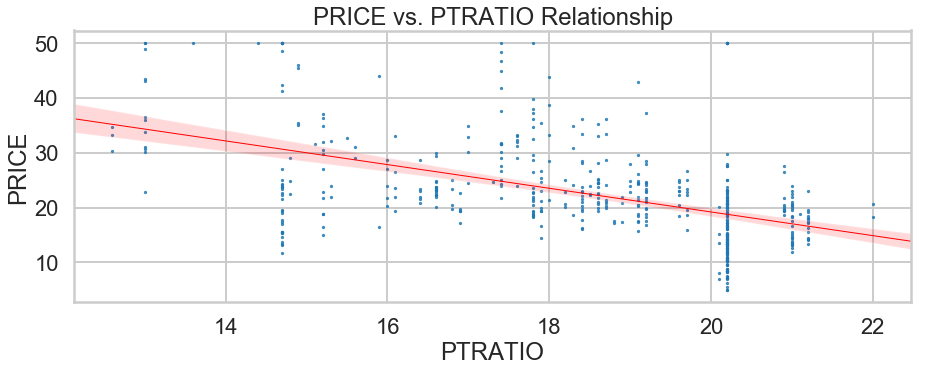

The r2 value of 25.78% indicates that the model weakly explains the variability of the response data around its mean.
The low r2 suggests that the model doesn't really fit the data.

The F-statistic here is 175.11, a significantly high number. The p-value for this is 0.000000 which is basically almost 0.
Since this is much lower than, say, a significant value of even just 1%, this indicates that the outcome we have 
is quite rare. This tells us that there is a relationship between the predictors (PTRATIO, in this case) and the 
response variable.


In [35]:
#getting intercept
m, b = np.polyfit(bos.PTRATIO, bos.PRICE, 1)
print("The intercept for the plot below is %.2f, which means our regression line assumes that at a base of 0 pupils \
\nper teacher, the average price of the house would be around $62,000. The slope is %.2f so for every 1 pupil \
\nper teacher, the house price decreases by around $2,000 on average." %(b, m))

#plotting Price vs. PTRATIO
f, axes = plt.subplots(figsize=(15,5))
ax=sns.regplot(y="PRICE", x="PTRATIO", data=bos, fit_reg=True, \
            scatter_kws={"s": 5}, line_kws={"linewidth":1, "color":"red"})
ax.set(title="PRICE vs. PTRATIO Relationship")
plt.show()

#r2
r=stats.linregress(bos.PRICE, bos.PTRATIO)[2]
r2 = r**2 *100
print("The r2 value of %.2f%% indicates that the model weakly explains the variability of the response data around \
its mean.\nThe low r2 suggests that the model doesn't really fit the data.\n" % r2)

#f
F = ols("PRICE ~ PTRATIO", bos).fit().fvalue
F_p = ols("PRICE ~ PTRATIO", bos).fit().f_pvalue
print("The F-statistic here is %.2f, a significantly high number. The p-value for this is %.6f which is basically almost \
0.\nSince this is much lower than, say, a significant value of even just 1%%, this indicates that the outcome we have \
\nis quite rare. This tells us that there is a relationship between the predictors (PTRATIO, in this case) and the \
\nresponse variable." % (F, F_p))

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [36]:
#f
F = ols("PRICE ~ (CRIM + RM + PTRATIO)", bos).fit().fvalue
F_p = ols("PRICE ~ (CRIM + RM + PTRATIO)", bos).fit().f_pvalue
print("The F-statistic for this three-feature model is %.2f. The p-value for this is %.6f which is again basically 0. \
\nThis value is extremely low indicating that this is an unlikely outcome if we have assumed that the fit of the \
\nintercept-only model and this model are equal. So we reject the null hypothesis and conclude that this three-feature \
\nmodel provides a much better fit than the intercept-only version, and that there is indeed a relationship among the \
\npredictors and the response.\n" % (F, F_p))

#r2
r2 = ols("PRICE ~ (CRIM + RM + PTRATIO)", bos).fit().rsquared
r2 *= 100
print("The r2 value of %.2f%% indicates that the model strongly explains the variability of the response data around \
its mean.\nThe high r2 suggests that the model does fit the data.\n" % r2)

The F-statistic for this three-feature model is 245.16. The p-value for this is 0.000000 which is again basically 0. 
This value is extremely low indicating that this is an unlikely outcome if we have assumed that the fit of the 
intercept-only model and this model are equal. So we reject the null hypothesis and conclude that this three-feature 
model provides a much better fit than the intercept-only version, and that there is indeed a relationship among the 
predictors and the response.

The r2 value of 59.43% indicates that the model strongly explains the variability of the response data around its mean.
The high r2 suggests that the model does fit the data.



## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [37]:
#f
F = ols("PRICE ~ (CRIM + RM + PTRATIO + ZN + LSTAT)", bos).fit().fvalue
F_p = ols("PRICE ~ (CRIM + RM + PTRATIO + ZN + LSTAT)", bos).fit().f_pvalue

#r2
r2 = ols("PRICE ~ (CRIM + RM + PTRATIO + ZN + LSTAT)", bos).fit().rsquared
r2 *= 100

#aic
aic_old = ols("PRICE ~ (CRIM + RM + PTRATIO)", bos).fit().aic
aic_new = ols("PRICE ~ (CRIM + RM + PTRATIO + ZN + LSTAT)", bos).fit().aic
aic_diff = aic_old - aic_new

print("Since we've already looked at the relationship of price with ZN and LSTAT, these two variables were added to the \
\nmodel generated above. The F value for this five-feature model is %.2f and its p-value is %.6f -- this tells us that \
\na relationship exists among this new set of predictors and the target, Price. \
\n\nThis model has an r2 coefficient of %.2f%% which is an improvement compared to the 59.43%% we got from the previous \
model.\nWe also arrived at an AIC of %.2f compared to the previous AIC of %.2f. That is a reduction of %.2f, which tells \
\nus that the inclusion of ZN and LSTAT indeed helped improve our model." % (F, F_p, r2, aic_new, aic_old, aic_diff))

Since we've already looked at the relationship of price with ZN and LSTAT, these two variables were added to the 
model generated above. The F value for this five-feature model is 214.27 and its p-value is 0.000000 -- this tells us that 
a relationship exists among this new set of predictors and the target, Price. 

This model has an r2 coefficient of 68.18% which is an improvement compared to the 59.43% we got from the previous model.
We also arrived at an AIC of 3113.07 compared to the previous AIC of 3231.95. That is a reduction of 118.87, which tells 
us that the inclusion of ZN and LSTAT indeed helped improve our model.



## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

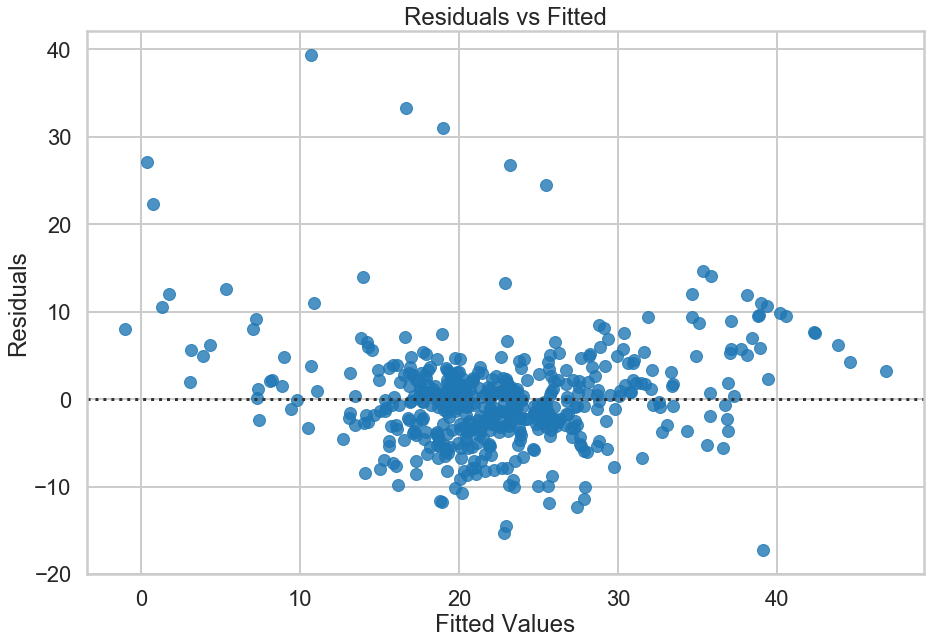

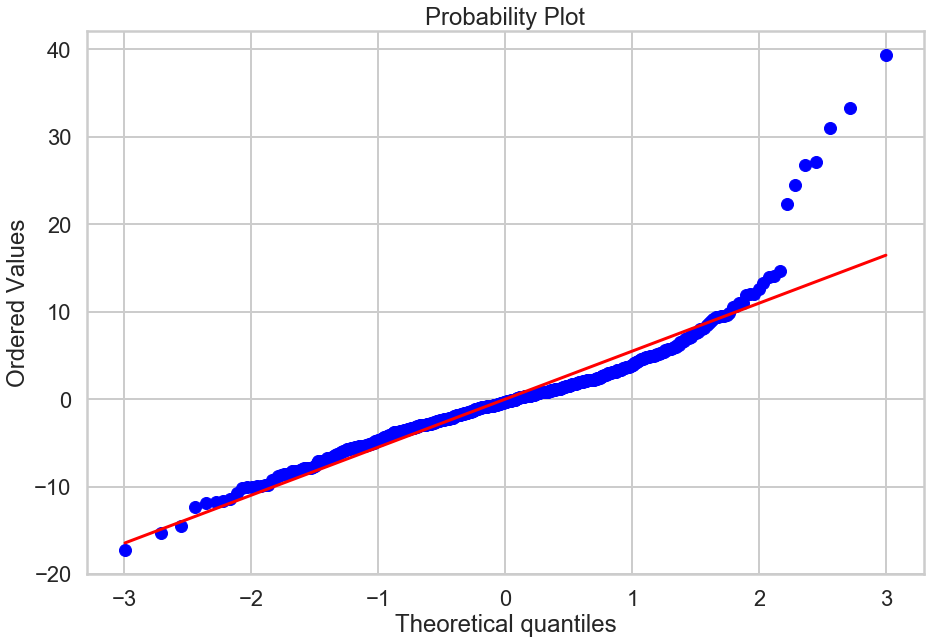

The residuals vs fitted values can help us in assessing linearity (by how far residuals are from zero) and 
homoscedasticity (if the residuals are equally spread along the dotted line). The QQ plot on the other hand helps 
us to check if the residuals meet the assumption of normality, as determined by how points line up closely to the 
diagonal line.

We see that our fitted values do meet all our assumptions, except that we have residuals that are noticeably 
large in magnitude (those above 20). Other than those, we see that on the residuals vs fitted plot, most of the points 
do cluster along the dotted line indicating homoscedasticity. Without the outliers, the points would lie within the 
range of up to ~15 units equidistant from the y=0 line.

The QQ plot also tells us that the data do meet the normality assumption, though we do see the presence of outliers
clearly violating these assumptions.


In [38]:
import pylab
import statsmodels.api as sm

#fitting values
model = ols("PRICE ~ (CRIM + RM + PTRATIO)", bos).fit()
model.fittedvalues

#plotting residuals
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.residplot(y=bos.PRICE, x=model.fittedvalues)
ax.set(title="Residuals vs Fitted", ylabel = "Residuals", xlabel="Fitted Values")
plt.show()

#plotting QQ
fig, ax = plt.subplots(figsize=(15,10))
stats.probplot(model.resid, dist="norm", plot=pylab)
pylab.show()

print("The residuals vs fitted values can help us in assessing linearity (by how far residuals are from zero) and \
\nhomoscedasticity (if the residuals are equally spread along the dotted line). The QQ plot on the other hand helps \
\nus to check if the residuals meet the assumption of normality, as determined by how points line up closely to the \
\ndiagonal line.\n")

print("We see that our fitted values do meet all our assumptions, except that we have residuals that are noticeably \
\nlarge in magnitude (those above 20). Other than those, we see that on the residuals vs fitted plot, most of the points \
\ndo cluster along the dotted line indicating homoscedasticity. Without the outliers, the points would lie within the \
\nrange of up to ~15 units equidistant from the y=0 line.\n\nThe QQ plot also tells us that the data do meet the \
normality assumption, though we do see the presence of outliers\nclearly violating these assumptions.")

In [39]:
bos["residuals"] = model.resid
display(bos[(bos["residuals"] <= -20) | (bos["residuals"] >= 20)])

print("The above are the characteristics of the residuals that are of significant values. Here, they are described \
\nas being equal or higher than 20.")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,residuals
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5,27.127667
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1,22.336529
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0,39.298836
369,5.66998,0.0,18.1,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0,26.814372
370,6.53876,0.0,18.1,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0,24.534761
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0,30.991160
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0,33.310083


The above are the characteristics of the residuals that are of significant values. Here, they are described 
as being equal or higher than 20.


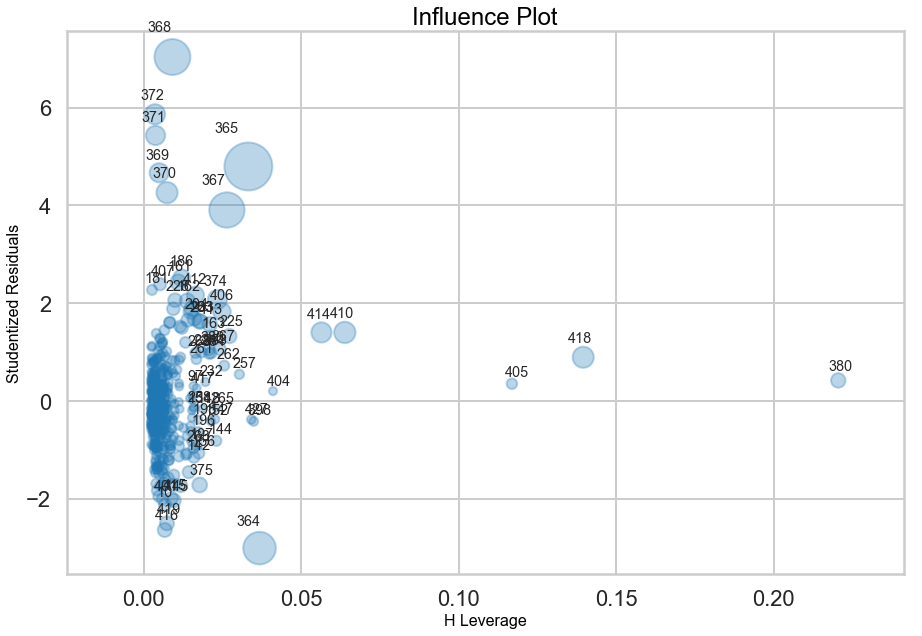

An outlier is a datapoint in a dataset that has significant residual. An observation with an extreme value on 
a predictor can be said to have high leverage. An outlier doesn't have to be influential. An observation is said to 
be influential if removing the observation substantially changes the estimate of the coefficients. Influence can be 
thought of as the product of leverage and outlierness.

Source: https://stats.idre.ucla.edu/stata/dae/robust-regression


In [40]:
#influence plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sm.graphics.influence_plot(model, alpha=0.05, criterion="cooks", \
                                plot_alpha=0.3, ax=ax)
plt.title("Influence Plot")
plt.show()

print("An outlier is a datapoint in a dataset that has significant residual. An observation with an extreme value on \
\na predictor can be said to have high leverage. An outlier doesn't have to be influential. An observation is said to \
\nbe influential if removing the observation substantially changes the estimate of the coefficients. Influence can be \
\nthought of as the product of leverage and outlierness.\n")
print(r"Source: https://stats.idre.ucla.edu/stata/dae/robust-regression")

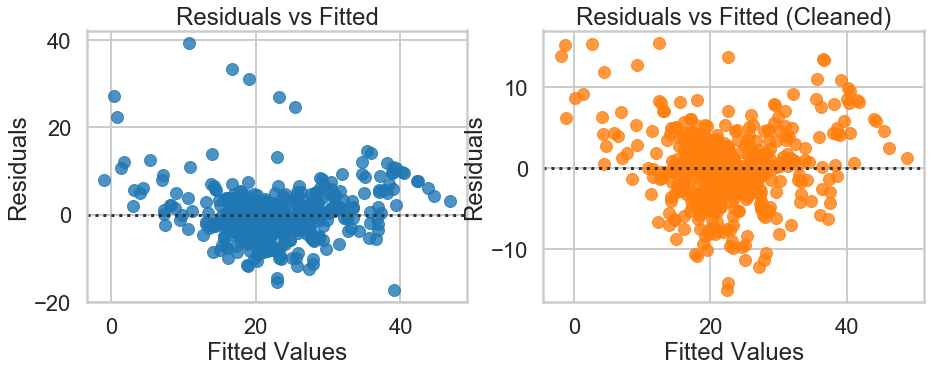

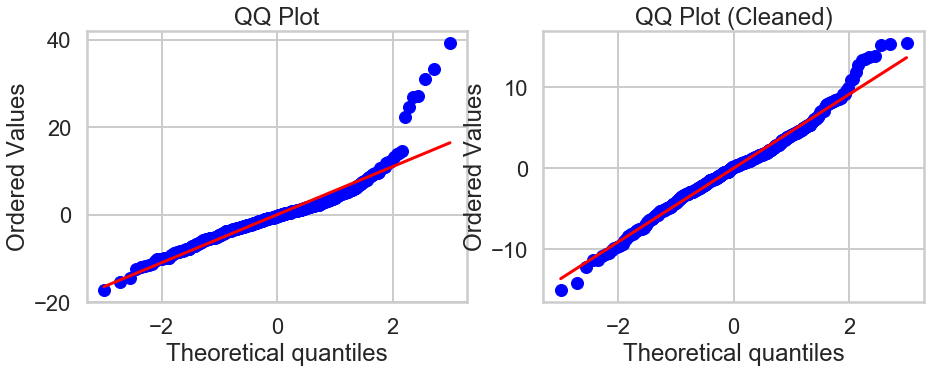

We create a new model called 'model_clean' by removing some of the most influential outliers observed from the 
original model. Once they were identified using cooks distance, their indices were used so they can be dropped from 
the Boston housing dataframe. We see the differences between the original and the cleaned model on the plots below.


In [41]:
#get cooks distance values
cooks = model.get_influence().cooks_distance[0]

#grab influential outliers
influence = []
for index, cook, in enumerate(cooks):
    influence.append((index, cook))
influence.sort(key=lambda x : x[1], reverse=True)
influence = [index[0] for index in influence[:11]]

#drop influential outliers from boston df
bos_clean = bos.drop(influence, axis=0)
model_clean = ols("PRICE ~ (CRIM + RM + PTRATIO)", bos_clean).fit()
model_clean.fittedvalues

#plot residuals vs fitted plots
f, axes = plt.subplots(1, 2, figsize=(15,5))
ax = sns.residplot(y=bos.PRICE, x=model.fittedvalues, ax=axes[0])
ax.set(title="Residuals vs Fitted", ylabel = "Residuals", xlabel="Fitted Values")
ax = sns.residplot(y=bos_clean.PRICE, x=model_clean.fittedvalues, ax=axes[1])
ax.set(title="Residuals vs Fitted (Cleaned)", ylabel = "Residuals", xlabel="Fitted Values")
plt.show()

#plot QQ plots
f, axes = plt.subplots(1, 2, figsize=(15,5))
plt.subplot(1, 2, 1)
stats.probplot(model.resid, dist="norm", plot=pylab)
plt.title("QQ Plot")
plt.subplot(1, 2, 2)
stats.probplot(model_clean.resid, dist="norm", plot=pylab)
plt.title("QQ Plot (Cleaned)")
pylab.show()

print("We create a new model called 'model_clean' by removing some of the most influential outliers observed from the \
\noriginal model. Once they were identified using cooks distance, their indices were used so they can be dropped from \
\nthe Boston housing dataframe. We see the differences between the original and the cleaned model on the plots below.")

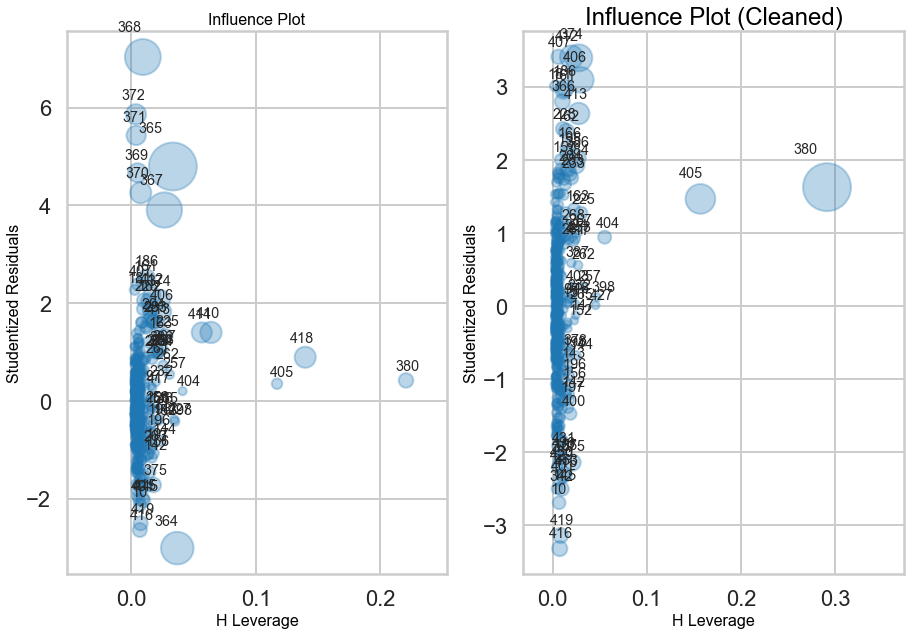

The removal of influential outliers had greatly improved our model. The r2 score increased from 59.43% to 73.15%. 
The AIC of the original model is 3231.95 while the cleaned model is 2915.91 -- that's a difference of 316.03.


In [42]:
#plot influence plots
f, axes = plt.subplots(1, 2, figsize=(15,10))
ax = sm.graphics.influence_plot(model, alpha=0.05, criterion="cooks", \
                                plot_alpha=0.3, ax=axes[0])
plt.title("Influence Plot")
ax = sm.graphics.influence_plot(model_clean, alpha=0.05, criterion="cooks", \
                                plot_alpha=0.3, ax=axes[1])
plt.title("Influence Plot (Cleaned)")
plt.show()

#r2
r2_old = model.rsquared * 100
r2_new = model_clean.rsquared * 100

#aic
aic_old = model.aic
aic_new = model_clean.aic
aic_diff = aic_old - aic_new

print("The removal of influential outliers had greatly improved our model. The r2 score increased from %.2f%% to %.2f%%. \
\nThe AIC of the original model is %.2f while the cleaned model is %.2f -- that's a difference of %.2f." \
      % (r2_old, r2_new, aic_old, aic_new, aic_diff))